## Step 1. Data Processing

### 1.1 Loading the Data

In [1]:
import os

# Change to your desired directory
os.chdir('/common/users/mx92/df_words') # change $USER to netid

# Confirm it's changed
print("Current directory:", os.getcwd())

Current directory: /common/users/mx92/df_words


In [2]:
import pickle

with open('./dfwords_0_20000.pkl', 'rb') as file:
    loaded_dfwords1 = pickle.load(file)

with open('./dfwords_20000_40000.pkl', 'rb') as file:
    loaded_dfwords2 = pickle.load(file)

with open('./dfwords_40000_60000.pkl', 'rb') as file:
    loaded_dfwords3 = pickle.load(file)

with open('./dfwords_60000_80000.pkl', 'rb') as file:
    loaded_dfwords4 = pickle.load(file)

with open('./dfwords_80000_100000.pkl', 'rb') as file:
    loaded_dfwords5 = pickle.load(file)

with open('./dfwords_100000_120000.pkl', 'rb') as file:
    loaded_dfwords6 = pickle.load(file)

with open('./dfwords_120000_140000.pkl', 'rb') as file:
    loaded_dfwords7 = pickle.load(file)

with open('./dfwords_140000_160000.pkl', 'rb') as file:
    loaded_dfwords8 = pickle.load(file)

with open('./dfwords_160000_180000.pkl', 'rb') as file:
    loaded_dfwords9 = pickle.load(file)

with open('./dfwords_180000_200000.pkl', 'rb') as file:
    loaded_dfwords10 = pickle.load(file)

with open('./dfwords_200000_227055.pkl', 'rb') as file:
    loaded_dfwords11 = pickle.load(file)

In [3]:
import pandas as pd

loaded_dfwords = pd.concat([loaded_dfwords1, loaded_dfwords2], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords3], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords4], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords5], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords6], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords7], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords8], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords9], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords10], ignore_index=True)  # vertical stack
loaded_dfwords = pd.concat([loaded_dfwords, loaded_dfwords11], ignore_index=True)  # vertical stack

In [4]:
loaded_dfwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227055 entries, 0 to 227054
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      227055 non-null  object
 1   text    227055 non-null  object
 2   image   227055 non-null  object
dtypes: object(3)
memory usage: 5.2+ MB


### 1.2 Cleaning the Data

In [5]:
import matplotlib.pyplot as plt

def show_image(row):
    plt.imshow(loaded_dfwords.iloc[row,2])
    plt.show()

In [6]:
import re

# Patter for all Special characters
special_char_pattern = r'[^a-zA-Z0-9\s]'  # Matches anything not alphanumeric or whitespace

# Select rows with special characters
special_char_rows = loaded_dfwords[loaded_dfwords['text'].str.contains(special_char_pattern, regex=True, na=False)]

In [7]:
special_char_rows.head()

,id,text,image
1,EHXbhtL,↳,"[[[187, 166, 139], [188, 167, 140], [190, 169,..."
3,EHXbhtL,↳,"[[[180, 161, 134], [181, 162, 135], [184, 163,..."
4,EHXbhtL,.,"[[[189, 167, 142], [189, 167, 142], [189, 167,..."
5,EHXbhtL,-bey,"[[[159, 144, 118], [159, 144, 118], [159, 144,..."
6,EHXbhtL,.,"[[[165, 151, 123], [164, 150, 122], [162, 148,..."


In [8]:
print(special_char_rows.loc[special_char_rows['id'] == 'A3b6IRB',])

            id text                                              image
17743  A3b6IRB   #2  [[[231, 222, 209], [230, 221, 208], [230, 220,...
17747  A3b6IRB   W/  [[[250, 232, 214], [251, 234, 215], [252, 235,...


In [9]:
print(loaded_dfwords.loc[loaded_dfwords['id'] == 'A3b6IRB',])

            id     text                                              image
17742  A3b6IRB  SURGERY  [[[227, 220, 209], [229, 220, 210], [230, 221,...
17743  A3b6IRB       #2  [[[231, 222, 209], [230, 221, 208], [230, 220,...
17744  A3b6IRB     N2O2  [[[249, 235, 213], [248, 234, 212], [248, 234,...
17745  A3b6IRB    CRASH  [[[102, 93, 133], [96, 87, 125], [91, 77, 118]...
17746  A3b6IRB     CART  [[[72, 68, 113], [72, 69, 109], [81, 76, 110],...
17747  A3b6IRB       W/  [[[250, 232, 214], [251, 234, 215], [252, 235,...
17748  A3b6IRB   SHARPS  [[[251, 233, 216], [251, 233, 216], [250, 232,...
17749  A3b6IRB    WHEEL  [[[170, 168, 192], [128, 126, 156], [112, 109,...
17750  A3b6IRB   CHAIRS  [[[245, 230, 214], [243, 227, 214], [242, 226,...
17751  A3b6IRB      SED  [[[121, 117, 154], [113, 109, 149], [103, 100,...
17752  A3b6IRB     ATED  [[[204, 199, 210], [188, 183, 204], [149, 145,...
17753  A3b6IRB  PATIENT  [[[158, 148, 174], [188, 176, 191], [196, 185,...
17754  A3b6IRB     EXIT  

In [10]:
allowed_pattern = r'^[\w\s\.,!?;:\-+*/=()\[\]{}<>@#\$%^&_\'"\t\n]+$'
mask = ~loaded_dfwords['text'].str.contains(allowed_pattern, regex=True)
non_standard_rows = loaded_dfwords[mask]

In [11]:
non_standard_rows.head()

,id,text,image
1,EHXbhtL,↳,"[[[187, 166, 139], [188, 167, 140], [190, 169,..."
3,EHXbhtL,↳,"[[[180, 161, 134], [181, 162, 135], [184, 163,..."
159,fbIRZCU,✓,"[[[178, 171, 162], [178, 171, 162], [178, 171,..."
448,17GNoPL,→,"[[[162, 188, 164], [162, 188, 164], [160, 186,..."
583,duRozwV,€,"[[[107, 107, 116], [109, 109, 118], [113, 115,..."


In [12]:
print(non_standard_rows.loc[non_standard_rows['id'] == 'sNpIWnz',])
print("\n\n\n")
print(non_standard_rows.loc[non_standard_rows['id'] == 'hhk8nvy',])

            id    text                                              image
17848  sNpIWnz    ·USA  [[[10, 9, 18], [9, 9, 18], [8, 10, 18], [10, 1...
17854  sNpIWnz  Japan|  [[[155, 153, 128], [166, 164, 138], [174, 175,...
17855  sNpIWnz  Japan|  [[[150, 153, 127], [128, 131, 106], [159, 162,...




            id          text  \
17949  hhk8nvy  4\/22\/2016.   

                                                   image  
17949  [[[169, 164, 165], [166, 164, 164], [166, 164,...  


In [13]:
mask = loaded_dfwords['text'].str.contains(r'\\', regex=True)
check_rows= loaded_dfwords[mask]

In [14]:
loaded_dfwords['text'] = loaded_dfwords['text'].str.replace('\\/', '/', regex=False)

In [15]:
mask = ~loaded_dfwords['text'].str.contains(allowed_pattern, regex=True)
non_standard_rows2 = loaded_dfwords[mask]

In [16]:
print("Words with special character:", len(non_standard_rows2), ", Percentage: ", len(non_standard_rows2)/len(loaded_dfwords))
print("Images with special charatcer:", len(non_standard_rows2['id'].unique()), ", Percentage: ", len(non_standard_rows2['id'].unique())/len(loaded_dfwords['id'].unique()))

Words with special character: 2004 , Percentage:  0.008826055361035872
Images with special charatcer: 565 , Percentage:  0.07076653306613226


In [17]:
loaded_dfwords=loaded_dfwords[~mask]

In [18]:
print("total number of words", len(loaded_dfwords))
print("total number of images", len(loaded_dfwords['id'].unique()))

total number of words 225051
total number of images 7977


In [19]:
# confirm there is no special characters
count_matching = loaded_dfwords['text'].str.contains(allowed_pattern, regex=True, na=False).sum()
print(f"Number of rows with allowed characters: {count_matching}")

Number of rows with allowed characters: 225051


In [20]:
pattern = r'^[^a-zA-Z0-9]+$'  # Matches strings with no alphanumeric chars at all
non_alnum_rows = loaded_dfwords[loaded_dfwords['text'].str.contains(pattern, regex=True, na=False)]

In [21]:
print("total number of words", len(loaded_dfwords))
print("total number of images", len(loaded_dfwords['id'].unique()))

total number of words 225051
total number of images 7977


In [22]:
non_alnum_rows.head(20)

,id,text,image
4,EHXbhtL,.,"[[[189, 167, 142], [189, 167, 142], [189, 167,..."
6,EHXbhtL,.,"[[[165, 151, 123], [164, 150, 122], [162, 148,..."
7,EHXbhtL,.,"[[[194, 170, 140], [192, 168, 138], [191, 167,..."
46,O91MhJ1,=>,"[[[135, 146, 148], [136, 148, 149], [137, 148,..."
68,O91MhJ1,+,"[[[86, 97, 143], [86, 96, 143], [83, 93, 139],..."
69,O91MhJ1,-,"[[[175, 173, 173], [173, 171, 171], [172, 170,..."
72,O91MhJ1,+,"[[[65, 77, 124], [96, 105, 148], [128, 137, 17..."
73,O91MhJ1,-,"[[[173, 167, 169], [173, 167, 168], [175, 170,..."
74,O91MhJ1,.,"[[[62, 90, 16], [69, 94, 21], [71, 96, 23], [7..."
75,O91MhJ1,.,"[[[65, 87, 14], [69, 92, 18], [67, 92, 16], [5..."


In [23]:
only_period_rows= loaded_dfwords[loaded_dfwords['text'] == '.']

In [24]:
loaded_dfwords = loaded_dfwords[loaded_dfwords['text'] != '.']

In [25]:
print("Words with only one period:", len(only_period_rows), ", Percentage: ", len(only_period_rows)/len(loaded_dfwords))
print("Images with special charatcer:", len(only_period_rows['id'].unique()), ", Percentage: ", len(only_period_rows['id'].unique())/len(loaded_dfwords['id'].unique()))

Words with only one period: 19567 , Percentage:  0.09522395904303985
Images with special charatcer: 3762 , Percentage:  0.48058252427184467


In [26]:
# check other rows that have ony characters
pattern = r'^[^a-zA-Z0-9]+$'  # Matches strings with no alphanumeric chars at all
non_alnum_rows2 = loaded_dfwords[loaded_dfwords['text'].str.contains(pattern, regex=True, na=False)]

In [27]:
non_alnum_rows2.head()

,id,text,image
46,O91MhJ1,=>,"[[[135, 146, 148], [136, 148, 149], [137, 148,..."
68,O91MhJ1,+,"[[[86, 97, 143], [86, 96, 143], [83, 93, 139],..."
69,O91MhJ1,-,"[[[175, 173, 173], [173, 171, 171], [172, 170,..."
72,O91MhJ1,+,"[[[65, 77, 124], [96, 105, 148], [128, 137, 17..."
73,O91MhJ1,-,"[[[173, 167, 169], [173, 167, 168], [175, 170,..."


### 1.3 Splitting the Data into Training and Testing Subsets

In [28]:
import numpy as np

# Get unique groups
unique_images = loaded_dfwords['id'].unique()


# Randomly select 10% for test 
np.random.seed(42)
test_images = np.random.choice(unique_images, 
                              size=int(len(unique_images)*0.2), 
                              replace=False)

In [29]:
test_df = loaded_dfwords[loaded_dfwords['id'].isin(test_images)]
training_df = loaded_dfwords[~loaded_dfwords['id'].isin(test_images)]

In [30]:
print("Words in Train Dataset:", len(training_df), ", Percentage: ", len(training_df)/len(loaded_dfwords))
print("Images in Train Dataset:", len(training_df['id'].unique()), ", Percentage: ", len(training_df['id'].unique())/len(loaded_dfwords['id'].unique()))

Words in Train Dataset: 165084 , Percentage:  0.8033910182787954
Images in Train Dataset: 6263 , Percentage:  0.8000766479305059


In [31]:
print("Words in Test Dataset:", len(test_df), ", Percentage: ", len(test_df)/len(loaded_dfwords))
print("Images in Test Dataset:", len(test_df['id'].unique()), ", Percentage: ", len(test_df['id'].unique())/len(loaded_dfwords['id'].unique()))

Words in Test Dataset: 40400 , Percentage:  0.19660898172120458
Images in Test Dataset: 1565 , Percentage:  0.19992335206949413


In [32]:
print("total number of words", len(loaded_dfwords))
print("total number of images", len(loaded_dfwords['id'].unique()))

total number of words 205484
total number of images 7828


### 1.4 Splitting the Training Data into Training and Validation Subsets

In [33]:
from sklearn.model_selection import train_test_split
import pandas as pd

train_df, eval_df = train_test_split(training_df, test_size=0.2, random_state=42)

train_df = train_df.reset_index(drop=True)
eval_df = eval_df.reset_index(drop=True)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132067 entries, 0 to 132066
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      132067 non-null  object
 1   text    132067 non-null  object
 2   image   132067 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


In [35]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33017 entries, 0 to 33016
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      33017 non-null  object
 1   text    33017 non-null  object
 2   image   33017 non-null  object
dtypes: object(3)
memory usage: 774.0+ KB


id                                                 Im6dkfT
text                                                   are
image    [[[192, 195, 203], [192, 195, 202], [191, 194,...
Name: 0, dtype: object


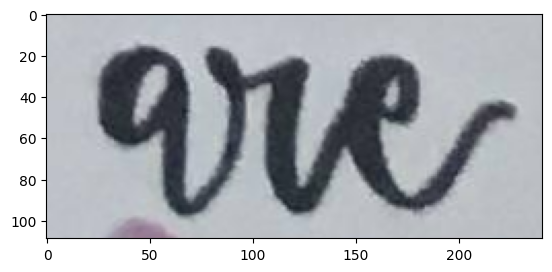

id                                                 9j7E3RC
text                                               Working
image    [[[141, 129, 123], [141, 129, 123], [143, 131,...
Name: 0, dtype: object


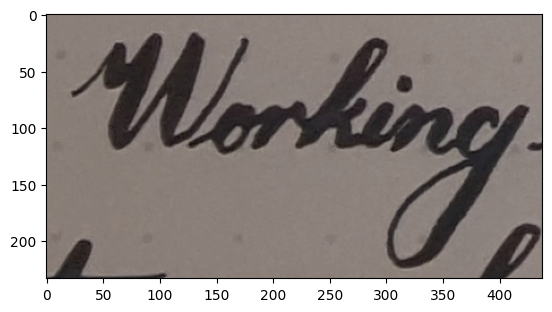

id                                                 7u2pNft
text                                                     4
image    [[[211, 209, 208], [210, 208, 207], [211, 209,...
Name: 0, dtype: object


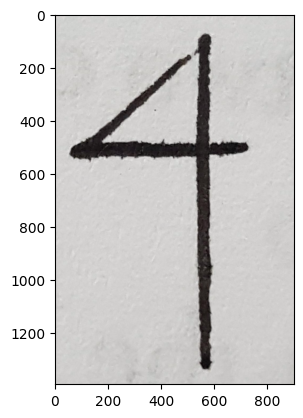

In [36]:
import matplotlib.pyplot as plt

print(train_df.iloc[0])
plt.imshow(train_df.iloc[0,2])
plt.show()

print(eval_df.iloc[0])
plt.imshow(eval_df.iloc[0,2])
plt.show()

print(test_df.iloc[0])
plt.imshow(test_df.iloc[0,2])
plt.show()

### 1.5 Saving the Dataset to CSV

In [37]:
# test_df_copy = test_df
# train_df_copy = training_df

In [38]:
# test_df_copy = test_df_copy.drop('image', axis=1)

In [39]:
# train_df_copy = train_df_copy.drop('image', axis=1)

In [40]:
# test_df_copy.info()

In [41]:
# train_df_copy.info()

In [42]:
# test_df_copy = test_df_copy.reset_index()
# test_df_copy['word_id'] = test_df_copy.index
# test_df_copy = test_df_copy.drop('index', axis=1)
# test_df_copy = test_df_copy.drop('level_0', axis=1)

# print(test_df_copy)

In [43]:
# train_df_copy = train_df_copy.reset_index()
# train_df_copy['word_id'] = train_df_copy.index
# train_df_copy = train_df_copy.drop('index', axis=1)
# train_df_copy = train_df_copy.drop('level_0', axis=1)

# print(train_df_copy)

In [44]:
# train_df_copy = train_df_copy[[train_df_copy.columns[2]] + train_df_copy.columns[:2].tolist()]

In [45]:
# test_df_copy = test_df_copy[[test_df_copy.columns[2]] + test_df_copy.columns[:2].tolist()]

In [46]:
# train_df_copy.info()

In [47]:
# test_df_copy.info()

In [48]:
# train_df_copy.head(10)

In [49]:
# test_df_copy.head(10)

In [50]:
# test_df_copy.to_csv('df_test.csv', index=False)
# train_df_copy.to_csv('df_train.csv', index=False)

## Step 2. Running the Model

### 2.1 Loading the Model

In [51]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

In [52]:
# get base model
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transfor

In [53]:
# import torch.nn as nn

# model = nn.DataParallel(model, device_ids=[0, 1, 2, 3])
# model = model.cuda()

In [54]:
# import torch

# # Check the number of GPUs available
# print(f"Number of GPUs available: {torch.cuda.device_count()}")

# # Check which GPU is currently being used
# for i in range(torch.cuda.device_count()):
#     print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

# # You can also check which GPU your model is on:
# model = model.cuda()  # Ensuring model is on GPU
# print(f"Model is on GPU: {torch.cuda.current_device()}")

# print(model)


### 2.2 Splitting the Training Data into Training and Validation Datasets

In [55]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class StyleDataset(Dataset):
    def __init__(self, df, processor, max_target_length=512):
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
      try:
          text = self.df['text'][idx]
          if not isinstance(text, str) or not text.strip():
              raise ValueError(f"Invalid text at index {idx}: {repr(text)}")
          image_id = self.df['id'][idx]
          try:
              image = self.df['image'][idx]
          except Exception as e:
              raise ValueError(f"Failed to load image for ID {image_id} at index {idx}") from e
          try:
              pixel_values = self.processor(image, return_tensors="pt").pixel_values
          except Exception as e:
              raise ValueError(f"Image processing failed at index {idx}") from e

          if torch.isnan(pixel_values).any() or torch.isinf(pixel_values).any():
              raise ValueError(f"Invalid pixel values (NaN/inf) at index {idx}")
          try:
              labels = self.processor.tokenizer(
                  text,
                  padding="max_length",
                  max_length=self.max_target_length
              ).input_ids
          except Exception as e:
              raise ValueError(f"Tokenization failed for text at index {idx}") from e

          # Replace pad_token_id with -100 for loss masking
          labels = [
              label if label != self.processor.tokenizer.pad_token_id else -100
              for label in labels
          ]
          encoding = {
              "pixel_values": pixel_values.squeeze(),
              "labels": torch.tensor(labels)
          }

          if encoding["pixel_values"].dim() != 3:
              raise ValueError(f"Invalid pixel_values shape at index {idx}")

          if encoding["labels"].numel() != self.max_target_length:
              raise ValueError(f"Labels length mismatch at index {idx}")

          return encoding

      except Exception as e:
          print(f"\nError in sample {idx}:")
          print(f"   Error type: {type(e).__name__}")
          print(f"   Details: {str(e)}")
          if hasattr(e, '__cause__') and e.__cause__:
              print(f"   Underlying error: {type(e.__cause__).__name__}: {str(e.__cause__)}")
          print(f"   DataFrame row:\n{self.df.iloc[idx]}")
          return None

In [56]:
# Tokenized
train_dataset = StyleDataset(df=train_df,processor=processor)
eval_dataset= StyleDataset(df=eval_df,processor=processor)

In [57]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))
# Check the first few samples manually
# for i in range(3):
#     print(train_dataset[i])  # Just print the first few samples from the dataset

Number of training examples: 132067
Number of validation examples: 33017


In [58]:
# get the label string from encoding
def get_label_str(encoding):
  labels = encoding['labels']
  labels[labels == -100] = processor.tokenizer.pad_token_id
  label_str = processor.decode(labels, skip_special_tokens=True)
  return label_str

In [59]:
get_label_str(train_dataset[0])

'are'

id                                                 Im6dkfT
text                                                   are
image    [[[192, 195, 203], [192, 195, 202], [191, 194,...
Name: 0, dtype: object


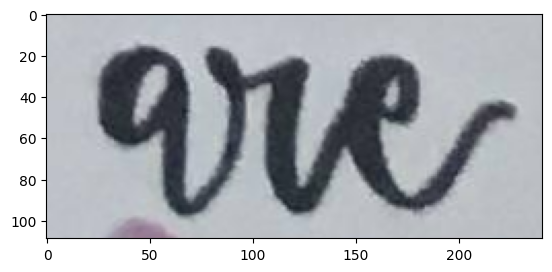

In [60]:
print(train_df.iloc[0])
plt.imshow(train_df.iloc[0,2])
plt.show()

### 2.3 Model Configuration

In [61]:
# Analyze your dataset first
avg_target_len = train_df['text'].apply(len).mean()
print("average target length", avg_target_len)
max_target_len = int(train_df['text'].apply(len).quantile(0.95))
print("maximum target length", max_target_len)

average target length 4.434817176130298
maximum target length 9


In [62]:
# Token Alignment
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = len(processor.tokenizer)


In [63]:
print(model.config.vocab_size)

50265


In [64]:
from transformers import GenerationConfig

generation_config = GenerationConfig(
    max_length=64,
    early_stopping=True,
    num_beams=4,
    length_penalty=2.0,
    no_repeat_ngram_size=3,
    eos_token_id=processor.tokenizer.sep_token_id,
    decoder_start_token_id=processor.tokenizer.cls_token_id,
    pad_token_id=processor.tokenizer.pad_token_id,
    skip_special_tokens=True  # Added for consistent decoding
)

### 2.4 Metrics

In [65]:
from evaluate import load
cer_metric = load("cer")

def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

## Step 3. Fine-tune

In [66]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Wed Apr 30 22:10:13 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A4500               On  | 00000000:81:00.0 Off |                    0 |
| 30%   32C    P8              15W / 200W |      1MiB / 19190MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [67]:
torch.cuda.empty_cache()

In [68]:
print(f"Allocated: {torch.cuda.memory_allocated() / 1024**3:.2f} GiB")
print(f"Reserved: {torch.cuda.memory_reserved() / 1024**3:.2f} GiB")

Allocated: 0.00 GiB
Reserved: 0.00 GiB


In [69]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    eval_strategy="steps",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    fp16=True,
    output_dir="./output/models/",
    logging_steps=2,
    save_steps=1000,
    eval_steps=200,
    num_train_epochs=3,
    generation_config=generation_config,
    logging_dir='./logs',  # Add log directory to track logs
)

In [70]:
from transformers import default_data_collator
# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    processing_class=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)
trainer.train(resume_from_checkpoint=True)  # Automatically continues from the latest checkpoint


/common/home/mx92/Desktop/CS439/myenv/lib/python3.10/site-packages/transformers/models/trocr/processing_trocr.py:152: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(
/common/home/mx92/Desktop/CS439/myenv/lib/python3.10/site-packages/accelerate/accelerator.py:449: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
There were missing keys in the checkpoint model loaded: ['decoder.output_projection.weight'].
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss,Validation Loss,Cer
4200,0.814700,2.991049,1.360376
4400,0.277000,2.999874,1.387699
4600,0.492200,3.014264,1.904914
4800,0.398500,3.409329,3.808388
5000,0.289300,4.335739,13.244627
5200,0.134900,4.828038,20.975939
5400,0.292100,4.622940,17.118037
5600,0.359200,3.604283,6.722368
5800,0.381500,4.126265,10.059053
6000,0.788100,5.063807,24.630434


/common/home/mx92/Desktop/CS439/myenv/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

/common/home/mx92/Desktop/CS439/myenv/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


KeyboardInterrupt: 

## Step 4. Evaluate

### 4.1 Load the Model

In [71]:
from transformers import VisionEncoderDecoderModel

model_path = "./output/models/checkpoint-5000"
model =  VisionEncoderDecoderModel.from_pretrained(model_path).to("cuda")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

### 4.2 Load Test Dataset

In [72]:
# Should be loaded from previous code
test_df.head()

,id,text,image
0,7u2pNft,4,"[[[211, 209, 208], [210, 208, 207], [211, 209,..."
274,FXwDU08,Funk,"[[[126, 145, 152], [124, 143, 150], [121, 140,..."
275,FXwDU08,adelic,"[[[136, 154, 165], [140, 159, 169], [133, 152,..."
276,FXwDU08,or,"[[[157, 177, 188], [157, 177, 188], [157, 177,..."
277,FXwDU08,Brain,"[[[180, 198, 215], [179, 197, 215], [181, 198,..."


### 4.3 Do Inference

In [73]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

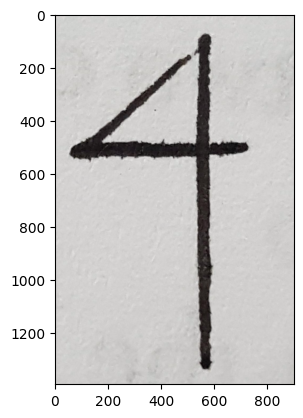

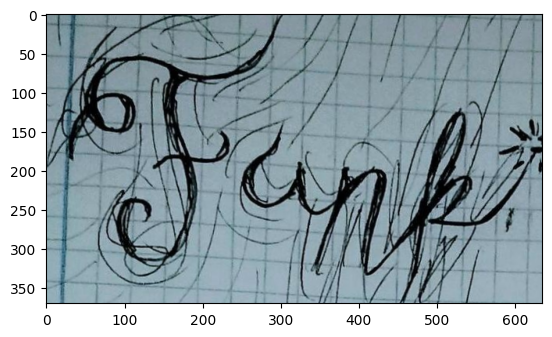

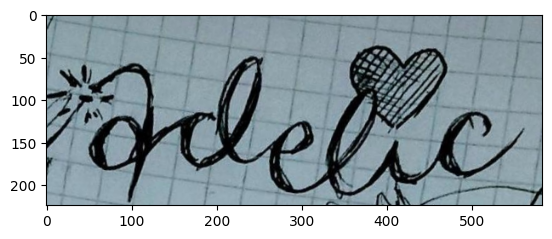

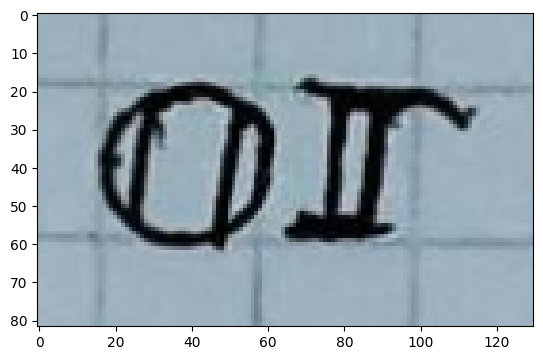

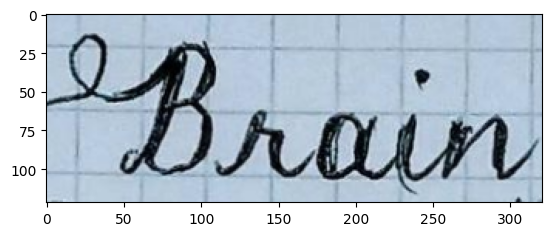

In [74]:
indices = [0,1,2,3,4,5]
images = [test_df['image'].iloc[idx] for idx in indices]
for i in range(5) :
    plt.imshow(images[i])
    plt.show()

In [75]:
from tqdm import tqdm

def readText_batch(df, indices):
    """Process multiple images at once"""
    # paths = [image_dataset_path + df['id'][idx] + '.jpg' for idx in indices]
    # images= [Image.open(path).convert("RGB") for path in paths]
    images = [test_df['image'].iloc[idx] for idx in indices]
    pixel_values = processor(images=images, return_tensors="pt").pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    return processor.batch_decode(generated_ids, skip_special_tokens=True)

def process_all_rows_batched(df, batch_size=8):
    results = []
    for i in tqdm(range(0, len(df), batch_size), desc="Processing batches"):
        batch_indices = range(i, min(i+batch_size, len(df)))
        try:
            batch_texts = readText_batch(df, batch_indices)
            for idx, text in zip(batch_indices, batch_texts):
                results.append({
                    'id': df['id'].iloc[idx],
                    'preds': df['text'].iloc[idx],
                    'labels': text
                })
        except Exception as e:
            print(f"Error in batch {i//batch_size}: {str(e)}")
            for idx in batch_indices:
                results.append({
                    'id': df['id'].iloc[idx],
                    'labels': df['text'].iloc[idx],
                    'preds': None,
                    'error': str(e)
                })
    return pd.DataFrame(results)

In [76]:
results_df = process_all_rows_batched(test_df, batch_size=8)

Processing batches: 100%|██████████| 5050/5050 [1:55:58<00:00,  1.38s/it]  


In [77]:
results_df.head(50)

,id,preds,labels
0,7u2pNft,4,444+4++44f44
1,FXwDU08,Funk,FFFFuckFFuckFuckFFJFFFrankFFKFFANKFFINKFFFEFFSFF
2,FXwDU08,adelic,whilewhilewhiletakewhilewhileHellowhilewhilema...
3,FXwDU08,or,CCC
4,FXwDU08,Brain,brainbrainbrainBrianbrainbraintrainbrainbrainr...
5,FXwDU08,I,IIIJIJJIIjJIjIJjIIgIITII7IIFII
6,FXwDU08,what,thatthatthatwhatthatwhatwhatthatthat
7,FXwDU08,I'm,III'mI'm'mIIjIIJIIJimIIImIIinIIhimIIFIIEmIIimII
8,FXwDU08,"doing,",doingdoinggoingdoingdoingdoingdodoingdoingdogd...
9,FXwDU08,she,shesheshetheshesheshshesheThesheshe


In [85]:
from tqdm import tqdm
from PIL import Image
def readText_batch(df, indices, model, processor):
    """Process multiple images at once"""
    images= [df['image'][idx]for idx in indices]
    pixel_values = processor(images=images, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    return processor.batch_decode(generated_ids, skip_special_tokens=True)

def process_all_rows_batched(df, model, processor, batch_size=8):
    results = []
    for i in tqdm(range(0, len(df), batch_size), desc="Processing batches"):
        batch_indices = range(i, min(i+batch_size, len(df)))
        try:
            batch_texts = readText_batch(df, batch_indices,model, processor)
            for idx, text in zip(batch_indices, batch_texts):
                results.append({
                    'id': df['id'].iloc[idx],
                    'true_text': df['text'].iloc[idx],
                    'predicted_text': text
                })
        except Exception as e:
            print(f"Error in batch {i//batch_size}: {str(e)}")
            for idx in batch_indices:
                results.append({
                    'id': df['id'].iloc[idx],
                    'true_text': df['text'].iloc[idx],
                    'predicted_text': None,
                    'error': str(e)
                })
    return pd.DataFrame(results)

# Usage (best for GPU utilization)
results_df2 = process_all_rows_batched(test_df, model, processor)

Processing batches:   1%|▏         | 69/5050 [00:00<00:08, 558.78it/s]

Error in batch 0: 1
Error in batch 1: 8
Error in batch 2: 16
Error in batch 3: 24
Error in batch 4: 32
Error in batch 5: 40
Error in batch 6: 48
Error in batch 7: 56
Error in batch 8: 64
Error in batch 9: 72
Error in batch 10: 80
Error in batch 11: 88
Error in batch 12: 96
Error in batch 13: 104
Error in batch 14: 112
Error in batch 15: 120
Error in batch 16: 128
Error in batch 17: 136
Error in batch 18: 144
Error in batch 19: 152
Error in batch 20: 160
Error in batch 21: 168
Error in batch 22: 176
Error in batch 23: 184
Error in batch 24: 192
Error in batch 25: 200
Error in batch 26: 208
Error in batch 27: 216
Error in batch 28: 224
Error in batch 29: 232
Error in batch 30: 240
Error in batch 31: 248
Error in batch 32: 256
Error in batch 33: 264
Error in batch 34: 272
Error in batch 35: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 36: 291
Error in batch 37: 296


Processing batches:   4%|▍         | 191/5050 [00:00<00:06, 795.17it/s]

Error in batch 114: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 115: 922
Error in batch 116: 928
Error in batch 117: 936
Error in batch 118: 944
Error in batch 119: 957
Error in batch 120: 962
Error in batch 121: 968
Error in batch 122: 976
Error in batch 123: 984
Error in batch 124: 992
Error in batch 125: 1000
Error in batch 126: 1008
Error in batch 127: 1016
Error in batch 128: 1024
Error in batch 129: 1032
Error in batch 130: 1040
Error in batch 131: 1048
Error in batch 132: 1056
Error in batch 133: 1064
Error in batch 134: 1072
Error in batch 135: 1080
Error in batch 136: 1088
Error in batch 137: 1096
Error in batch 138: 1104
Error in batch 139: 1112
Error in batch 140: 1120
Error in batch 141: 1128
Error in batch 142: 1136
Error in batch 143: 1144
Error in batch 144: 1152
Error in batch 145: 1160
Error in batch 146: 1168
Error in batch 147: 1176
Error in b

Processing batches:   5%|▌         | 271/5050 [00:00<00:21, 226.87it/s]

Error in batch 213: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 214: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 215: 1727
Error in batch 216: 1728
Error in batch 217: 1736
Error in batch 218: 1744
Error in batch 219: 1752
Error in batch 220: 1760
Error in batch 221: 1768
Error in batch 222: 1776
Error in batch 223: 1787
Error in batch 224: 1792
Error in batch 225: 1800
Error in batch 226: 1810
Error in batch 227: 1816
Error in batch 228: 1824
Error in batch 229: 1832
Error in batch 230: 1840
Error in batch 231: 1848
Error in batch 232: 1856
Error in batch 233: 1864
Error in batch 234: 1872
Error in batch 235: 1880
Error in batch 236: 1888
Error in batch 237: 1898
Error in batch 238: 1904
Error in batch 239: 1912
Error in batch 240: 1920


Processing batches:   6%|▋         | 320/5050 [00:01<00:21, 221.84it/s]

Error in batch 305: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 306: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 307: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 308: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 309: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 310: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input shoul

Processing batches:   9%|▉         | 442/5050 [00:01<00:14, 326.25it/s]

Error in batch 326: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 327: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 328: 2627
Error in batch 329: 2632
Error in batch 330: 2640
Error in batch 331: 2648
Error in batch 332: 2656
Error in batch 333: 2664
Error in batch 334: 2672
Error in batch 335: 2680
Error in batch 336: 2688
Error in batch 337: 2696
Error in batch 338: 2704
Error in batch 339: 2712
Error in batch 340: 2720
Error in batch 341: 2728
Error in batch 342: 2736
Error in batch 343: 2744
Error in batch 344: 2754
Error in batch 345: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 346: 2775
Error in batch 347: 2776


Processing batches:  10%|▉         | 489/5050 [00:01<00:21, 213.66it/s]

Error in batch 450: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 451: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 452: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 453: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 454: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 455: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input shoul

Processing batches:  12%|█▏        | 583/5050 [00:02<00:14, 312.17it/s]

Error in batch 565: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 566: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 567: 4536
Error in batch 568: 4547
Error in batch 569: 4552
Error in batch 570: 4560
Error in batch 571: 4568
Error in batch 572: 4576
Error in batch 573: 4584
Error in batch 574: 4592
Error in batch 575: 4600
Error in batch 576: 4608
Error in batch 577: 4616
Error in batch 578: 4624
Error in batch 579: 4632
Error in batch 580: 4640
Error in batch 581: 4648
Error in batch 582: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 583: 4664
Error in batch 584: 4672
Error in batch 585: 4680
Error in batch 586: 4688


Processing batches:  13%|█▎        | 636/5050 [00:02<00:24, 177.27it/s]

Error in batch 614: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 615: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 616: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 617: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 618: 4950
Error in batch 619: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 620: 4962
Error in batch 621: 4968
Error in batch 622: 4976
Error in batch 623: 4984


Processing batches:  13%|█▎        | 675/5050 [00:02<00:23, 190.19it/s]

Error in batch 640: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 641: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 642: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 643: 5144
Error in batch 644: 5152
Error in batch 645: 5160
Error in batch 646: 5168
Error in batch 647: 5176
Error in batch 648: 5184
Error in batch 649: 5192
Error in batch 650: 5200
Error in batch 651: 5208
Error in batch 652: 5216
Error in batch 653: 5224
Error in batch 654: 5232
Error in batch 655: 5240
Error in batch 656: 5248
Error in batch 657: 5256
Error in batch 658: 5264
Error in batch 659: 5272
Error in batch 660: 5280
Error in batch 661: 5288


Processing batches:  14%|█▍        | 710/5050 [00:03<00:24, 179.31it/s]

Error in batch 686: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 687: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 688: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 689: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 690: 5523
Error in batch 691: 5528
Error in batch 692: 5536
Error in batch 693: 5544
Error in batch 694: 5552
Error in batch 695: 5560
Error in batch 696: 5568
Error in batch 697: 5576
Error in batch 698: 5584
Error in batch 699: 5592
Error in batch 700: 5600
Error in batch 701: 5608


Processing batches:  16%|█▌        | 798/5050 [00:03<00:19, 216.72it/s]

Error in batch 763: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 764: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 765: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 766: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 767: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 768: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input shoul

Processing batches:  17%|█▋        | 840/5050 [00:03<00:17, 243.12it/s]

Error in batch 836: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 837: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 838: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 839: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 840: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 841: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input shoul

Processing batches:  17%|█▋        | 872/5050 [00:03<00:27, 153.53it/s]

Error in batch 852: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 853: 6826
Error in batch 854: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 855: 6846
Error in batch 856: 6848
Error in batch 857: 6856
Error in batch 858: 6864
Error in batch 859: 6872
Error in batch 860: 6880
Error in batch 861: 6888
Error in batch 862: 6896
Error in batch 863: 6904
Error in batch 864: 6912
Error in batch 865: 6920
Error in batch 866: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 867: 6941
Error in batch 868: 6944
Error in batch 869: 6952
Error in batch 870: 6964
Error in batch 871: Input type (torch.FloatTensor) and weight type (torch.c

Processing batches:  20%|█▉        | 1000/5050 [00:04<00:14, 284.39it/s]

Error in batch 911: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 912: 7303
Error in batch 913: 7304
Error in batch 914: 7312
Error in batch 915: 7320
Error in batch 916: 7328
Error in batch 917: 7336
Error in batch 918: 7344
Error in batch 919: 7352
Error in batch 920: 7360
Error in batch 921: 7368
Error in batch 922: 7376
Error in batch 923: 7384
Error in batch 924: 7392
Error in batch 925: 7400
Error in batch 926: 7408
Error in batch 927: 7416
Error in batch 928: 7424
Error in batch 929: 7432
Error in batch 930: 7440
Error in batch 931: 7448
Error in batch 932: 7456
Error in batch 933: 7464
Error in batch 934: 7472
Error in batch 935: 7480
Error in batch 936: 7488
Error in batch 937: 7496
Error in batch 938: 7504
Error in batch 939: 7512
Error in batch 940: 7520
Error in batch 941: 7528
Error in batch 942: 7536
Error in batch 943: 7544
Error in batch 944: 7552


Processing batches:  21%|██▏       | 1077/5050 [00:04<00:11, 359.63it/s]

Error in batch 1075: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1076: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1077: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1078: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1079: 8634
Error in batch 1080: 8640
Error in batch 1081: 8648
Error in batch 1082: 8656
Error in batch 1083: 8664
Error in batch 1084: 8672
Error in batch 1085: 8680
Error in batch 1086: 8688
Error in batch 1087: 8696
Error in batch 1088: 8704
Error in batch 1089: 8712
Error in b

Processing batches:  22%|██▏       | 1125/5050 [00:04<00:12, 308.13it/s]

Error in batch 1117: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1118: 8950
Error in batch 1119: 8954
Error in batch 1120: 8960
Error in batch 1121: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1122: 8981
Error in batch 1123: 8984
Error in batch 1124: 8992
Error in batch 1125: 9000
Error in batch 1126: 9008
Error in batch 1127: 9016
Error in batch 1128: 9024
Error in batch 1129: 9032
Error in batch 1130: 9040
Error in batch 1131: 9048
Error in batch 1132: 9056
Error in batch 1133: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1134: 9079
Error in batch 1135: 9080
Error in batch 1136: 9088
Error in batch 1137: 9096
Erro

Processing batches:  23%|██▎       | 1165/5050 [00:04<00:14, 260.93it/s]

Error in batch 1145: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1146: 9169
Error in batch 1147: 9176
Error in batch 1148: 9184
Error in batch 1149: 9197
Error in batch 1150: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1151: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1152: 9218
Error in batch 1153: 9224
Error in batch 1154: 9232
Error in batch 1155: 9240
Error in batch 1156: 9248
Error in batch 1157: 9256
Error in batch 1158: 9264
Error in batch 1159: 9272
Error in batch 1160: 9280
Error in batch 1161: 9288
Error in batch 1162: 9296
Error in batch 1163: 9304
Error in batch 1164: 9312
Error in batch 1165: 9320
Erro

Processing batches:  24%|██▎       | 1198/5050 [00:05<00:18, 209.50it/s]

Error in batch 1192: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1193: 9544
Error in batch 1194: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1195: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1196: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1197: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1198: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) s

Processing batches:  26%|██▌       | 1298/5050 [00:05<00:11, 327.89it/s]

Error in batch 1255: 10040
Error in batch 1256: 10048
Error in batch 1257: 10056
Error in batch 1258: 10064
Error in batch 1259: 10072
Error in batch 1260: 10080
Error in batch 1261: 10088
Error in batch 1262: 10096
Error in batch 1263: 10104
Error in batch 1264: 10112
Error in batch 1265: 10120
Error in batch 1266: 10128
Error in batch 1267: 10136
Error in batch 1268: 10144
Error in batch 1269: 10152
Error in batch 1270: 10160
Error in batch 1271: 10168
Error in batch 1272: 10181
Error in batch 1273: 10184
Error in batch 1274: 10192
Error in batch 1275: 10200
Error in batch 1276: 10208
Error in batch 1277: 10216
Error in batch 1278: 10224
Error in batch 1279: 10232
Error in batch 1280: 10240
Error in batch 1281: 10248
Error in batch 1282: 10256
Error in batch 1283: 10264
Error in batch 1284: 10272
Error in batch 1285: 10280
Error in batch 1286: 10288
Error in batch 1287: 10296
Error in batch 1288: 10304
Error in batch 1289: 10312
Error in batch 1290: 10320
Error in batch 1291: 10328
E

Processing batches:  27%|██▋       | 1376/5050 [00:05<00:19, 185.55it/s]

Error in batch 1318: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1319: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1320: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1321: 10575
Error in batch 1322: 10576
Error in batch 1323: 10584
Error in batch 1324: 10592
Error in batch 1325: 10600
Error in batch 1326: 10608
Error in batch 1327: 10616
Error in batch 1328: 10624
Error in batch 1329: 10632
Error in batch 1330: 10640
Error in batch 1331: 10648
Error in batch 1332: 10656
Error in batch 1333: 10664
Error in batch 1334: 10672
Error in batch 1335: 10680
Error in batch 1336: 10688
Error in batch 1337: 10696
Error in batc

Processing batches:  28%|██▊       | 1437/5050 [00:06<00:21, 170.65it/s]

Error in batch 1384: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1385: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1386: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1387: 11100
Error in batch 1388: 11104
Error in batch 1389: 11112
Error in batch 1390: 11120
Error in batch 1391: 11128
Error in batch 1392: 11136
Error in batch 1393: 11144
Error in batch 1394: 11152
Error in batch 1395: 11160
Error in batch 1396: 11168
Error in batch 1397: 11176
Error in batch 1398: 11184
Error in batch 1399: 11192
Error in batch 1400: 11200
Error in batch 1401: 11208
Error in batch 1402: 11216
Error in batch 1403: 11224
Error in batc

Processing batches:  31%|███       | 1552/5050 [00:06<00:11, 308.49it/s]

Error in batch 1437: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1438: 11504
Error in batch 1439: 11512
Error in batch 1440: 11520
Error in batch 1441: 11528
Error in batch 1442: 11536
Error in batch 1443: 11544
Error in batch 1444: 11554
Error in batch 1445: 11560
Error in batch 1446: 11568
Error in batch 1447: 11576
Error in batch 1448: 11584
Error in batch 1449: 11592
Error in batch 1450: 11600
Error in batch 1451: 11608
Error in batch 1452: 11616
Error in batch 1453: 11624
Error in batch 1454: 11632
Error in batch 1455: 11640
Error in batch 1456: 11648
Error in batch 1457: 11656
Error in batch 1458: 11664
Error in batch 1459: 11672
Error in batch 1460: 11687
Error in batch 1461: 11688
Error in batch 1462: 11696
Error in batch 1463: 11704
Error in batch 1464: 11712
Error in batch 1465: 11720
Error in batch 1466: 11728
Error in batch 1467: 11736
Error in batch

Processing batches:  32%|███▏      | 1597/5050 [00:07<00:18, 191.80it/s]

Error in batch 1586: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1587: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1588: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1589: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1590: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1591: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input

Processing batches:  35%|███▍      | 1759/5050 [00:07<00:10, 327.80it/s]

Error in batch 1646: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1647: 13181
Error in batch 1648: 13184
Error in batch 1649: 13192
Error in batch 1650: 13200
Error in batch 1651: 13208
Error in batch 1652: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1653: 13227
Error in batch 1654: 13232
Error in batch 1655: 13240
Error in batch 1656: 13248
Error in batch 1657: 13256
Error in batch 1658: 13264
Error in batch 1659: 13272
Error in batch 1660: 13280
Error in batch 1661: 13288
Error in batch 1662: 13296
Error in batch 1663: 13310
Error in batch 1664: 13312
Error in batch 1665: 13320
Error in batch 1666: 13328
Error in batch 1667: 13336
Error in batch 1668: 13344
Error in batch 1669: 13352
Error in batch 1670: 13360
Error in batch 1671: 13368


Processing batches:  36%|███▌      | 1809/5050 [00:07<00:14, 224.81it/s]

Error in batch 1774: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1775: 14202
Error in batch 1776: 14212
Error in batch 1777: 14219
Error in batch 1778: 14224
Error in batch 1779: 14232
Error in batch 1780: 14240
Error in batch 1781: 14248
Error in batch 1782: 14256
Error in batch 1783: 14264
Error in batch 1784: 14272
Error in batch 1785: 14280
Error in batch 1786: 14288
Error in batch 1787: 14296
Error in batch 1788: 14304
Error in batch 1789: 14312
Error in batch 1790: 14320
Error in batch 1791: 14328
Error in batch 1792: 14336
Error in batch 1793: 14344
Error in batch 1794: 14352
Error in batch 1795: 14360
Error in batch 1796: 14368
Error in batch 1797: 14376
Error in batch 1798: 14384
Error in batch 1799: 14392
Error in batch 1800: 14400
Error in batch 1801: 14408
Error in batch 1802: 14416
Error in batch 1803: Input type (torch.FloatTensor) and weight type 

Processing batches:  37%|███▋      | 1850/5050 [00:07<00:13, 241.92it/s]

Error in batch 1809: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1810: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1811: 14493
Error in batch 1812: 14496
Error in batch 1813: 14504
Error in batch 1814: 14512
Error in batch 1815: 14520
Error in batch 1816: 14528
Error in batch 1817: 14536
Error in batch 1818: 14544
Error in batch 1819: 14552
Error in batch 1820: 14560
Error in batch 1821: 14568
Error in batch 1822: 14576
Error in batch 1823: 14584
Error in batch 1824: 14592
Error in batch 1825: 14600
Error in batch 1826: 14608
Error in batch 1827: 14616
Error in batch 1828: 14624
Error in batch 1829: 14632
Error in batch 1830: 14640
Error in batch 1831: 14648
Error in batch 1832: 14656
Error in batch 1833: 14664
Error in batch 1834: 14672


Processing batches:  39%|███▊      | 1956/5050 [00:08<00:09, 312.31it/s]

Error in batch 1854: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 1855: 14840
Error in batch 1856: 14848
Error in batch 1857: 14856
Error in batch 1858: 14864
Error in batch 1859: 14872
Error in batch 1860: 14880
Error in batch 1861: 14888
Error in batch 1862: 14896
Error in batch 1863: 14904
Error in batch 1864: 14912
Error in batch 1865: 14920
Error in batch 1866: 14928
Error in batch 1867: 14936
Error in batch 1868: 14944
Error in batch 1869: 14952
Error in batch 1870: 14960
Error in batch 1871: 14968
Error in batch 1872: 14976
Error in batch 1873: 14984
Error in batch 1874: 14992
Error in batch 1875: 15000
Error in batch 1876: 15008
Error in batch 1877: 15018
Error in batch 1878: 15024
Error in batch 1879: 15032
Error in batch 1880: 15040
Error in batch 1881: 15048
Error in batch 1882: 15056
Error in batch 1883: 15064
Error in batch 1884: 15072
Error in batch

Processing batches:  40%|███▉      | 2007/5050 [00:08<00:09, 333.98it/s]

Error in batch 2005: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2006: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2007: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2008: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2009: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2010: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input

Processing batches:  44%|████▍     | 2211/5050 [00:08<00:05, 556.58it/s]

Error in batch 2012: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2013: 16107
Error in batch 2014: 16112
Error in batch 2015: 16120
Error in batch 2016: 16128
Error in batch 2017: 16136
Error in batch 2018: 16144
Error in batch 2019: 16152
Error in batch 2020: 16160
Error in batch 2021: 16168
Error in batch 2022: 16176
Error in batch 2023: 16184
Error in batch 2024: 16192
Error in batch 2025: 16200
Error in batch 2026: 16208
Error in batch 2027: 16216
Error in batch 2028: 16224
Error in batch 2029: 16232
Error in batch 2030: 16240
Error in batch 2031: 16248
Error in batch 2032: 16256
Error in batch 2033: 16264
Error in batch 2034: 16272
Error in batch 2035: 16280
Error in batch 2036: 16294
Error in batch 2037: 16296
Error in batch 2038: 16304
Error in batch 2039: 16312
Error in batch 2040: 16320
Error in batch 2041: 16328
Error in batch 2042: 16336
Error in batch

Processing batches:  45%|████▌     | 2282/5050 [00:08<00:06, 454.28it/s]

Error in batch 2214: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2215: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2216: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2217: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2218: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2219: 17759
Error in batch 2220: 17760
Error in batch 2221: 17768
Error in batch 2222: 17776
Error in bat

Processing batches:  47%|████▋     | 2388/5050 [00:09<00:08, 321.25it/s]

Error in batch 2339: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2340: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2341: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2342: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2343: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2344: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input

Processing batches:  50%|████▉     | 2524/5050 [00:09<00:05, 485.52it/s]

Error in batch 2432: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2433: 19470
Error in batch 2434: 19473
Error in batch 2435: 19480
Error in batch 2436: 19488
Error in batch 2437: 19496
Error in batch 2438: 19504
Error in batch 2439: 19512
Error in batch 2440: 19520
Error in batch 2441: 19528
Error in batch 2442: 19536
Error in batch 2443: 19544
Error in batch 2444: 19552
Error in batch 2445: 19560
Error in batch 2446: 19568
Error in batch 2447: 19576
Error in batch 2448: 19584
Error in batch 2449: 19592
Error in batch 2450: 19600
Error in batch 2451: 19608
Error in batch 2452: 19616
Error in batch 2453: 19624
Error in batch 2454: 19632
Error in batch 2455: 19640
Error in batch 2456: 19648
Error in batch 2457: 19656
Error in batch 2458: 19664
Error in batch 2459: 19672
Error in batch 2460: 19680
Error in batch 2461: 19688
Error in batch 2462: 19696
Error in batch

Processing batches:  51%|█████     | 2588/5050 [00:09<00:05, 449.07it/s]

Error in batch 2563: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2564: 20516
Error in batch 2565: 20520
Error in batch 2566: 20528
Error in batch 2567: 20536
Error in batch 2568: 20544
Error in batch 2569: 20552
Error in batch 2570: 20560
Error in batch 2571: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2572: 20578
Error in batch 2573: 20584
Error in batch 2574: 20592
Error in batch 2575: 20600
Error in batch 2576: 20608
Error in batch 2577: 20623
Error in batch 2578: 20624
Error in batch 2579: 20637
Error in batch 2580: 20640
Error in batch 2581: 20648
Error in batch 2582: 20656
Error in batch 2583: 20664
Error in batch 2584: 20672
Error in batch 2585: 20680
Error in batch 2586: 20688
Error in batch 2587: 20696
Error in batch 2588: 20704


Processing batches:  52%|█████▏    | 2644/5050 [00:09<00:07, 303.07it/s]

Error in batch 2622: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2623: 20988
Error in batch 2624: 20992
Error in batch 2625: 21000
Error in batch 2626: 21008
Error in batch 2627: 21016
Error in batch 2628: 21024
Error in batch 2629: 21032
Error in batch 2630: 21040
Error in batch 2631: 21048
Error in batch 2632: 21056
Error in batch 2633: 21064
Error in batch 2634: 21072
Error in batch 2635: 21080
Error in batch 2636: 21088
Error in batch 2637: 21096
Error in batch 2638: 21104
Error in batch 2639: 21112
Error in batch 2640: 21120
Error in batch 2641: 21128
Error in batch 2642: 21136
Error in batch 2643: 21144
Error in batch 2644: 21152
Error in batch 2645: 21160
Error in batch 2646: 21168
Error in batch 2647: 21176
Error in batch 2648: 21184
Error in batch 2649: 21192
Error in batch 2650: 21200
Error in batch 2651: 21208
Error in batch 2652: 21216
Error in batch

Processing batches:  54%|█████▍    | 2723/5050 [00:10<00:08, 259.89it/s]

Error in batch 2680: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2681: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2682: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2683: 21464
Error in batch 2684: 21478
Error in batch 2685: 21480
Error in batch 2686: 21488
Error in batch 2687: 21496
Error in batch 2688: 21504
Error in batch 2689: 21512
Error in batch 2690: 21520
Error in batch 2691: 21528
Error in batch 2692: 21536
Error in batch 2693: 21544
Error in batch 2694: 21552
Error in batch 2695: 21560
Error in batch 2696: 21568
Error in batch 2697: 21576
Error in batch 2698: 21584
Error in batch 2699: 21592
Error in batc

Processing batches:  57%|█████▋    | 2895/5050 [00:10<00:04, 443.40it/s]

Error in batch 2801: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2802: 22417
Error in batch 2803: 22424
Error in batch 2804: 22432
Error in batch 2805: 22440
Error in batch 2806: 22448
Error in batch 2807: 22456
Error in batch 2808: 22464
Error in batch 2809: 22472
Error in batch 2810: 22480
Error in batch 2811: 22488
Error in batch 2812: 22496
Error in batch 2813: 22504
Error in batch 2814: 22512
Error in batch 2815: 22520
Error in batch 2816: 22528
Error in batch 2817: 22536
Error in batch 2818: 22544
Error in batch 2819: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2820: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batc

Processing batches:  58%|█████▊    | 2953/5050 [00:10<00:04, 472.32it/s]

Error in batch 2895: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2896: 23169
Error in batch 2897: 23176
Error in batch 2898: 23185
Error in batch 2899: 23192
Error in batch 2900: 23200
Error in batch 2901: 23208
Error in batch 2902: 23216
Error in batch 2903: 23224
Error in batch 2904: 23232
Error in batch 2905: 23240
Error in batch 2906: 23248
Error in batch 2907: 23256
Error in batch 2908: 23264
Error in batch 2909: 23272
Error in batch 2910: 23280
Error in batch 2911: 23288
Error in batch 2912: 23296
Error in batch 2913: 23304
Error in batch 2914: 23312
Error in batch 2915: 23320
Error in batch 2916: 23328
Error in batch 2917: 23336
Error in batch 2918: 23344
Error in batch 2919: 23352
Error in batch 2920: 23360
Error in batch 2921: 23371
Error in batch 2922: 23376
Error in batch 2923: 23390
Error in batch 2924: 23392
Error in batch 2925: 23400
Error in batch

Processing batches:  60%|█████▉    | 3011/5050 [00:10<00:04, 412.10it/s]

Error in batch 2961: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2962: 23702
Error in batch 2963: 23704
Error in batch 2964: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 2965: 23720
Error in batch 2966: 23728
Error in batch 2967: 23736
Error in batch 2968: 23744
Error in batch 2969: 23752
Error in batch 2970: 23760
Error in batch 2971: 23768
Error in batch 2972: 23776
Error in batch 2973: 23784
Error in batch 2974: 23792
Error in batch 2975: 23800
Error in batch 2976: 23808
Error in batch 2977: 23816
Error in batch 2978: 23824
Error in batch 2979: 23832
Error in batch 2980: 23840
Error in batch 2981: 23850
Error in batch 2982: 23856
Error in batch 2983: 23864
Error in batch 2984: 23872
Error in batch 2985: 23880
Error in batch 2986: 23888


Processing batches:  61%|██████▏   | 3104/5050 [00:11<00:05, 359.26it/s]

Error in batch 3017: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3018: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3019: 24158
Error in batch 3020: 24160
Error in batch 3021: 24168
Error in batch 3022: 24176
Error in batch 3023: 24184
Error in batch 3024: 24192
Error in batch 3025: 24200
Error in batch 3026: 24208
Error in batch 3027: 24216
Error in batch 3028: 24224
Error in batch 3029: 24232
Error in batch 3030: 24240
Error in batch 3031: 24248
Error in batch 3032: 24256
Error in batch 3033: 24264
Error in batch 3034: 24272
Error in batch 3035: 24280
Error in batch 3036: 24288
Error in batch 3037: 24296
Error in batch 3038: 24304
Error in batch 3039: 24312
Error in batch 3040: 24320
Error in batch 3041: 24328
Error in batch 3042: 24336


Processing batches:  62%|██████▏   | 3145/5050 [00:12<00:13, 138.59it/s]

Error in batch 3129: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3130: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3131: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3132: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3133: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3134: 25079
Error in batch 3135: 25080
Error in batch 3136: 25088
Error in batch 3137: 25096
Error in bat

Processing batches:  65%|██████▌   | 3284/5050 [00:12<00:07, 225.37it/s]

Error in batch 3155: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3156: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3157: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3158: 25268
Error in batch 3159: 25272
Error in batch 3160: 25280
Error in batch 3161: 25288
Error in batch 3162: 25296
Error in batch 3163: 25304
Error in batch 3164: 25312
Error in batch 3165: 25320
Error in batch 3166: 25328
Error in batch 3167: 25336
Error in batch 3168: 25344
Error in batch 3169: 25352
Error in batch 3170: 25360
Error in batch 3171: 25368
Error in batch 3172: 25376
Error in batch 3173: 25384
Error in batch 3174: 25392
Error in batc

Processing batches:  67%|██████▋   | 3407/5050 [00:13<00:07, 220.25it/s]

Error in batch 3310: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3311: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3312: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3313: 26504
Error in batch 3314: 26512
Error in batch 3315: 26520
Error in batch 3316: 26528
Error in batch 3317: 26536
Error in batch 3318: 26544
Error in batch 3319: 26552
Error in batch 3320: 26560
Error in batch 3321: 26568
Error in batch 3322: 26576
Error in batch 3323: 26584
Error in batch 3324: 26592
Error in batch 3325: 26600
Error in batch 3326: 26608
Error in batch 3327: 26616
Error in batch 3328: 26624
Error in batch 3329: 26632
Error in batc

Processing batches:  68%|██████▊   | 3451/5050 [00:13<00:08, 187.50it/s]

Error in batch 3421: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3422: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3423: 27384
Error in batch 3424: 27392
Error in batch 3425: 27400
Error in batch 3426: 27408
Error in batch 3427: 27416
Error in batch 3428: 27424
Error in batch 3429: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3430: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3431: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a M

Processing batches:  70%|██████▉   | 3512/5050 [00:13<00:09, 165.47it/s]

Error in batch 3482: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3483: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3484: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3485: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3486: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3487: 27901
Error in batch 3488: 27906
Error in batch 3489: 27912
Error in batch 3490: 27920
Error in bat

Processing batches:  70%|███████   | 3538/5050 [00:14<00:08, 168.18it/s]

Error in batch 3523: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3524: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3525: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3526: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3527: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3528: 28228
Error in batch 3529: 28232
Error in batch 3530: 28240
Error in batch 3531: 28248
Error in bat

Processing batches:  71%|███████   | 3562/5050 [00:14<00:12, 119.12it/s]

Error in batch 3557: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3558: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3559: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3560: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3561: 28492
Error in batch 3562: 28496
Error in batch 3563: 28504
Error in batch 3564: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3565: 28524
Error in bat

Processing batches:  72%|███████▏  | 3645/5050 [00:14<00:07, 176.00it/s]

Error in batch 3618: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3619: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3620: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3621: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3622: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3623: 28984
Error in batch 3624: 28992
Error in batch 3625: 29000
Error in batch 3626: 29008
Error in bat

Processing batches:  73%|███████▎  | 3669/5050 [00:14<00:08, 168.13it/s]

Error in batch 3656: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3657: 29259
Error in batch 3658: 29264
Error in batch 3659: 29272
Error in batch 3660: 29280
Error in batch 3661: 29288
Error in batch 3662: 29296
Error in batch 3663: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3664: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3665: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3666: 29334
Error in batch 3667: 29339
Error in batch 3668: 29344
Error in batch 3669: 29352
Error in batch 3670: 29360

Processing batches:  73%|███████▎  | 3708/5050 [00:15<00:10, 128.01it/s]

Error in batch 3690: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3691: 29533
Error in batch 3692: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3693: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3694: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3695: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3696: 29569
Error in batch 3697: 29576
Error in batch 3698: 29584
Error in bat

Processing batches:  77%|███████▋  | 3870/5050 [00:15<00:03, 328.01it/s]

Error in batch 3788: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3789: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3790: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3791: 30332
Error in batch 3792: 30336
Error in batch 3793: 30344
Error in batch 3794: 30352
Error in batch 3795: 30360
Error in batch 3796: 30368
Error in batch 3797: 30376
Error in batch 3798: 30384
Error in batch 3799: 30392
Error in batch 3800: 30400
Error in batch 3801: 30408
Error in batch 3802: 30416
Error in batch 3803: 30424
Error in batch 3804: 30432
Error in batch 3805: 30440
Error in batch 3806: 30448
Error in batch 3807: 30456
Error in batc

Processing batches:  77%|███████▋  | 3910/5050 [00:15<00:04, 276.11it/s]

Error in batch 3871: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3872: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3873: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3874: 30997
Error in batch 3875: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3876: 31009
Error in batch 3877: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3878: Input type (torch.FloatTensor) and weight typ

Processing batches:  78%|███████▊  | 3944/5050 [00:16<00:04, 266.31it/s]

Error in batch 3911: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3912: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 3913: 31310
Error in batch 3914: 31312
Error in batch 3915: 31320
Error in batch 3916: 31328
Error in batch 3917: 31336
Error in batch 3918: 31348
Error in batch 3919: 31352
Error in batch 3920: 31360
Error in batch 3921: 31368
Error in batch 3922: 31376
Error in batch 3923: 31384
Error in batch 3924: 31392
Error in batch 3925: 31400
Error in batch 3926: 31408
Error in batch 3927: 31416
Error in batch 3928: 31424
Error in batch 3929: 31432
Error in batch 3930: 31440
Error in batch 3931: 31448
Error in batch 3932: 31456
Error in batch 3933: 31464
Error in batch 3934: 31472
Error in batch 3935: 31480
Error in batch 3936: 31494


Processing batches:  80%|███████▉  | 4037/5050 [00:16<00:02, 383.00it/s]

Error in batch 4036: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4037: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4038: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4039: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4040: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4041: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input

Processing batches:  81%|████████  | 4082/5050 [00:16<00:04, 239.45it/s]

Error in batch 4045: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4046: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4047: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4048: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4049: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4050: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input

Processing batches:  83%|████████▎ | 4195/5050 [00:16<00:02, 377.99it/s]

Error in batch 4120: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4121: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4122: 32976
Error in batch 4123: 32984
Error in batch 4124: 32992
Error in batch 4125: 33000
Error in batch 4126: 33008
Error in batch 4127: 33016
Error in batch 4128: 33024
Error in batch 4129: 33032
Error in batch 4130: 33040
Error in batch 4131: 33048
Error in batch 4132: 33056
Error in batch 4133: 33064
Error in batch 4134: 33072
Error in batch 4135: 33080
Error in batch 4136: 33089
Error in batch 4137: 33096
Error in batch 4138: 33104
Error in batch 4139: 33112
Error in batch 4140: 33120
Error in batch 4141: 33128
Error in batch 4142: 33136
Error in batch 4143: 33144
Error in batch 4144: 33152
Error in batch 4145: 33160


Processing batches:  86%|████████▌ | 4354/5050 [00:17<00:01, 369.76it/s]

Error in batch 4249: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4250: 34005
Error in batch 4251: 34008
Error in batch 4252: 34016
Error in batch 4253: 34024
Error in batch 4254: 34032
Error in batch 4255: 34040
Error in batch 4256: 34048
Error in batch 4257: 34056
Error in batch 4258: 34064
Error in batch 4259: 34072
Error in batch 4260: 34080
Error in batch 4261: 34088
Error in batch 4262: 34096
Error in batch 4263: 34104
Error in batch 4264: 34112
Error in batch 4265: 34120
Error in batch 4266: 34128
Error in batch 4267: 34136
Error in batch 4268: 34144
Error in batch 4269: 34152
Error in batch 4270: 34160
Error in batch 4271: 34168
Error in batch 4272: 34176
Error in batch 4273: 34184
Error in batch 4274: 34192
Error in batch 4275: 34200
Error in batch 4276: 34208
Error in batch 4277: 34216
Error in batch 4278: 34224
Error in batch 4279: 34232
Error in batch

Processing batches:  87%|████████▋ | 4410/5050 [00:17<00:02, 272.54it/s]

Error in batch 4379: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4380: 35047
Error in batch 4381: 35048
Error in batch 4382: 35056
Error in batch 4383: 35064
Error in batch 4384: 35072
Error in batch 4385: 35080
Error in batch 4386: 35088
Error in batch 4387: 35096
Error in batch 4388: 35104
Error in batch 4389: 35112
Error in batch 4390: 35120
Error in batch 4391: 35128
Error in batch 4392: 35136
Error in batch 4393: 35144
Error in batch 4394: 35152
Error in batch 4395: 35160
Error in batch 4396: 35168
Error in batch 4397: 35176
Error in batch 4398: 35184
Error in batch 4399: 35192
Error in batch 4400: 35200
Error in batch 4401: 35208
Error in batch 4402: 35216
Error in batch 4403: 35224
Error in batch 4404: 35232
Error in batch 4405: 35240
Error in batch 4406: 35248
Error in batch 4407: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) sh

Processing batches:  88%|████████▊ | 4453/5050 [00:17<00:02, 228.28it/s]

Error in batch 4424: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4425: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4426: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4427: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4428: 35424
Error in batch 4429: 35436
Error in batch 4430: 35440
Error in batch 4431: 35452
Error in batch 4432: 35459
Error in batch 4433: 35465
Error in batch 4434: 35474
Error in batch 4435: 35485
Error in batch 4436: 35495
Error in batch 4437: Input type (torch.FloatTensor) a

Processing batches:  89%|████████▉ | 4488/5050 [00:18<00:04, 137.25it/s]

Error in batch 4471: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4472: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4473: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4474: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4475: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4476: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input

Processing batches:  93%|█████████▎| 4716/5050 [00:18<00:00, 353.75it/s]

Error in batch 4503: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4504: 36035
Error in batch 4505: 36040
Error in batch 4506: 36048
Error in batch 4507: 36056
Error in batch 4508: 36064
Error in batch 4509: 36072
Error in batch 4510: 36080
Error in batch 4511: 36088
Error in batch 4512: 36096
Error in batch 4513: 36104
Error in batch 4514: 36112
Error in batch 4515: 36120
Error in batch 4516: 36128
Error in batch 4517: 36136
Error in batch 4518: 36144
Error in batch 4519: 36152
Error in batch 4520: 36160
Error in batch 4521: 36168
Error in batch 4522: 36176
Error in batch 4523: 36184
Error in batch 4524: 36192
Error in batch 4525: 36200
Error in batch 4526: 36208
Error in batch 4527: 36216
Error in batch 4528: 36224
Error in batch 4529: 36232
Error in batch 4530: 36240
Error in batch 4531: 36248
Error in batch 4532: 36256
Error in batch 4533: 36264
Error in batch

Processing batches:  95%|█████████▍| 4787/5050 [00:19<00:00, 322.80it/s]

Error in batch 4758: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4759: 38078
Error in batch 4760: 38080
Error in batch 4761: 38088
Error in batch 4762: 38096
Error in batch 4763: 38104
Error in batch 4764: 38112
Error in batch 4765: 38120
Error in batch 4766: 38128
Error in batch 4767: 38136
Error in batch 4768: 38144
Error in batch 4769: 38152
Error in batch 4770: 38160
Error in batch 4771: 38168
Error in batch 4772: 38176
Error in batch 4773: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4774: 38194
Error in batch 4775: 38200
Error in batch 4776: 38208
Error in batch 4777: 38216
Error in batch 4778: 38224
Error in batch 4779: 38232
Error in batch 4780: 38240
Error in batch 4781: 38248
Error in batch 4782: 38256
Error in batch 4783: 38264


Processing batches:  96%|█████████▌| 4844/5050 [00:19<00:00, 296.27it/s]

Error in batch 4833: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4834: 38675
Error in batch 4835: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4836: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4837: 38702
Error in batch 4838: 38704
Error in batch 4839: 38712
Error in batch 4840: 38720
Error in batch 4841: 38728
Error in batch 4842: 38736
Error in batch 4843: 38744
Error in batch 4844: 38752
Error in batch 4845: 38760
Error in batch 4846: 38768
Error in batch 4847: 38776
Error in batch 4848: 38784
Error in batch 4849: 38792
Error in batch 4850: 38800
Error in batch 4851: 38808
Error in batch 4852: 38816
Error in batc

Processing batches:  97%|█████████▋| 4891/5050 [00:19<00:00, 240.32it/s]

Error in batch 4859: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4860: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4861: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4862: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4863: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4864: 38914
Error in batch 4865: 38925
Error in batch 4866: 38928
Error in batch 4867: 38936
Error in bat

Processing batches:  98%|█████████▊| 4933/5050 [00:19<00:00, 259.03it/s]

Error in batch 4928: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4929: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4930: 39443
Error in batch 4931: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4932: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4933: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4934: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) 

Processing batches:  98%|█████████▊| 4970/5050 [00:20<00:00, 148.01it/s]

Error in batch 4967: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4968: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4969: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4970: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4971: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4972: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input

Processing batches:  99%|█████████▉| 4998/5050 [00:20<00:00, 124.29it/s]

Error in batch 4981: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4982: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 4983: 39868
Error in batch 4984: 39872
Error in batch 4985: 39880
Error in batch 4986: 39888
Error in batch 4987: 39896
Error in batch 4988: 39904
Error in batch 4989: 39912
Error in batch 4990: 39920
Error in batch 4991: 39928
Error in batch 4992: 39936
Error in batch 4993: 39944
Error in batch 4994: 39952
Error in batch 4995: 39960
Error in batch 4996: 39968
Error in batch 4997: 39976
Error in batch 4998: 39984
Error in batch 4999: 39992
Error in batch 5000: 40000
Error in batch 5001: 40008
Error in batch 5002: 40016
Error in batch 5003: 40024
Error in batch 5004: 40032
Error in batch 5005: 40040
Error in batch 5006: 40048


Processing batches: 100%|██████████| 5050/5050 [00:21<00:00, 240.14it/s]

Error in batch 5013: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 5014: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
Error in batch 5015: 40127
Error in batch 5016: 40128
Error in batch 5017: 40136
Error in batch 5018: 40144
Error in batch 5019: 40152
Error in batch 5020: 40160
Error in batch 5021: 40168
Error in batch 5022: 40176
Error in batch 5023: 40184
Error in batch 5024: 40192
Error in batch 5025: 40200
Error in batch 5026: 40208
Error in batch 5027: 40216
Error in batch 5028: 40224
Error in batch 5029: 40232
Error in batch 5030: 40240
Error in batch 5031: 40248
Error in batch 5032: 40256
Error in batch 5033: 40264
Error in batch 5034: 40272
Error in batch 5035: 40280
Error in batch 5036: 40288
Error in batch 5037: 40296
Error in batch 5038: 40304


### 4.4 Evaluate

In [ ]:
# to analyze character difference rate, remove all the spaces into one token
# results_df["pred"]= results_df["predicted_text"].str.replace(' ', '')
# results_df["label"]= results_df["true_text"].str.replace(' ', '')

In [78]:
from evaluate import load
cer = load("cer")

def compute_eval_metrics(pred_str, label_str):
    pred_str=pred_str.strip()
    label_str=label_str.strip()
    # max_len = max(len(pred_str), len(label_str))
    # pred_str = pred_str.ljust(max_len)  
    # label_str = label_str.ljust(max_len)
    try: 
        score = cer.compute(predictions=[pred_str], references=[label_str])
        return score
    except Exception as e:
        print("error", e)
        print(type(pred_str), len(pred_str), pred_str)
        print(type(label_str), len(label_str), label_str)
        return None

In [79]:
from tqdm import tqdm
tqdm.pandas()  # Enable progress_apply for pandas

results_df["metrics"] = results_df.progress_apply(
    lambda row: compute_eval_metrics(row["labels"], row["preds"]),
    axis=1
)

100%|██████████| 40400/40400 [03:24<00:00, 197.27it/s]


### 4.5 Analyze Performance

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_eval(values):
    # Plotting
    plt.figure(figsize=(8, 5))
    sns.kdeplot(values, shade=True)
    plt.xlabel("Edit Distance")
    plt.title("KDE of Edit Distances")
    plt.show()
        
    # Boxplot
    plt.boxplot(values, vert=False, patch_artist=True)
    plt.xlabel("Edit Distance")
    plt.title("Boxplot of Edit Distances")
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_2658130/805715199.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, shade=True)


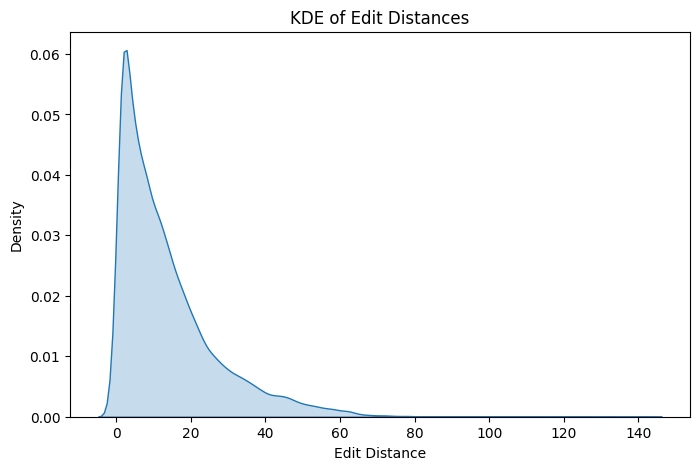

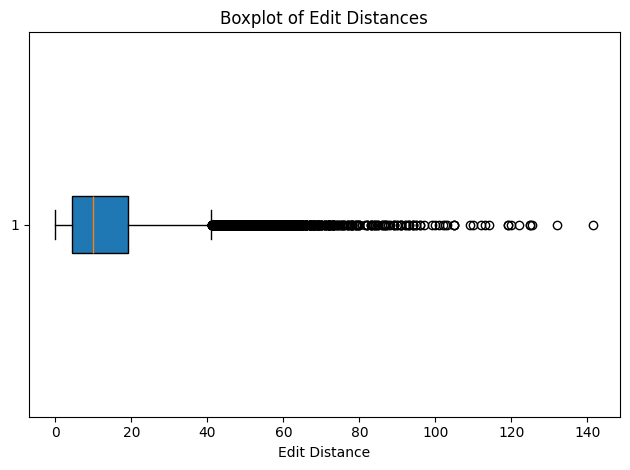

In [82]:
plot_eval(results_df["metrics"])

/tmp/ipykernel_2658130/805715199.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, shade=True)


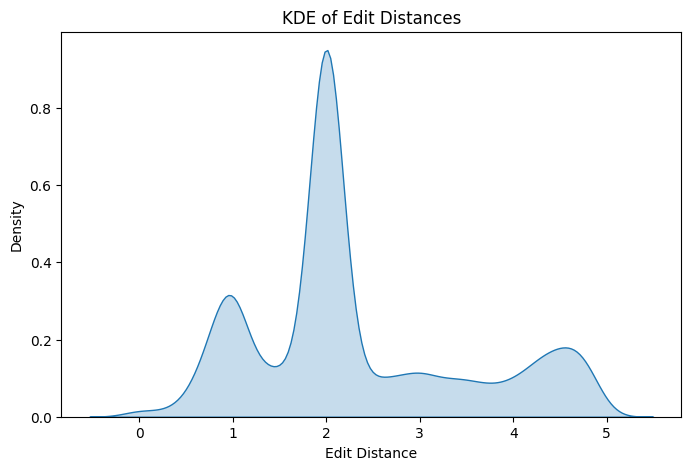

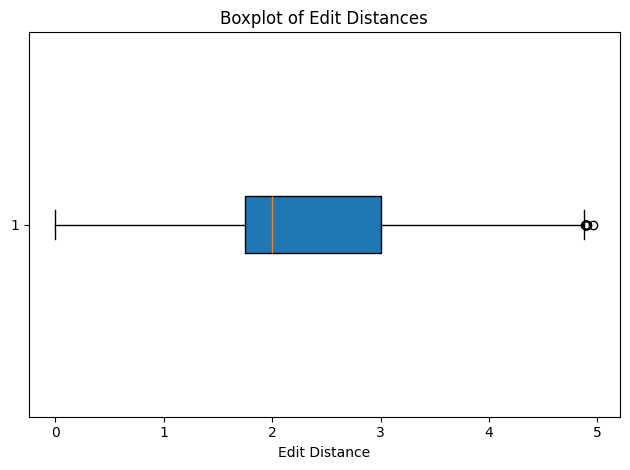

In [83]:
# remove outliers
results_normal= results_df[results_df["metrics"]<5]
plot_eval(results_normal["metrics"])

In [ ]:
import numpy as np
def show_state(values):
    stats = {
        "mean": np.mean(values),
        "median": np.median(values),
        "std": np.std(values),
        "min": np.min(values),
        "max": np.max(values),
        "quantiles": np.quantile(values, [0.25, 0.5, 0.75]),
    }
    
    # 3. Print results
    print("Summary Statistics:")
    print(f"- Mean ± Std: {stats['mean']:.2f} ± {stats['std']:.2f}")
    print(f"- Median (IQR): {stats['median']:.2f} ({stats['quantiles'][0]:.2f}–{stats['quantiles'][2]:.2f})")
    print(f"- Range: [{stats['min']}, {stats['max']}]")
    print(f"- Quantiles (25th, 50th, 75th): {stats['quantiles'].round(2)}")

In [ ]:
show_state(results_df["metrics"])